<a href="https://colab.research.google.com/github/gasymova-r/grapevine_leaves_classifier_cnn/blob/main/grapevine_leaves_classifier_with_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Enabling GPU

In [ ]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


## Importing libraries and data

In [ ]:
# importing libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import numpy as np
import urllib.request
import keras.utils as image
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

In [ ]:
!kaggle datasets download -d muratkokludataset/grapevine-leaves-image-dataset

 91% 99.0M/109M [00:01<00:00, 69.2MB/s]
100% 109M/109M [00:01<00:00, 82.6MB/s] 


In [ ]:
!unzip grapevine-leaves-image-dataset.zip

Archive:  grapevine-leaves-image-dataset.zip
  inflating: Grapevine_Leaves_Image_Dataset/Ak/Ak (1).png  
  inflating: Grapevine_Leaves_Image_Dataset/Ak/Ak (10).png  
  inflating: Grapevine_Leaves_Image_Dataset/Ak/Ak (100).png  
  inflating: Grapevine_Leaves_Image_Dataset/Ak/Ak (11).png  
  inflating: Grapevine_Leaves_Image_Dataset/Ak/Ak (12).png  
  inflating: Grapevine_Leaves_Image_Dataset/Ak/Ak (13).png  
  inflating: Grapevine_Leaves_Image_Dataset/Ak/Ak (14).png  
  inflating: Grapevine_Leaves_Image_Dataset/Ak/Ak (15).png  
  inflating: Grapevine_Leaves_Image_Dataset/Ak/Ak (16).png  
  inflating: Grapevine_Leaves_Image_Dataset/Ak/Ak (17).png  
  inflating: Grapevine_Leaves_Image_Dataset/Ak/Ak (18).png  
  inflating: Grapevine_Leaves_Image_Dataset/Ak/Ak (19).png  
  inflating: Grapevine_Leaves_Image_Dataset/Ak/Ak (2).png  
  inflating: Grapevine_Leaves_Image_Dataset/Ak/Ak (20).png  
  inflating: Grapevine_Leaves_Image_Dataset/Ak/Ak (21).png  
  inflating: Grapevine_Leaves_Image_Datas

In [ ]:
# setting up a working directory
working_dir = "Grapevine_Leaves_Image_Dataset"

(511, 511, 4)


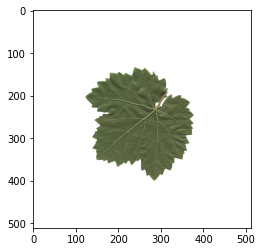

In [ ]:
# looking at one of the images to define shape
image_ex = "Grapevine_Leaves_Image_Dataset/Ak/Ak (10).png"
img=plt.imread(image_ex)
print(img.shape)
imshow(img)

In [ ]:
# did this to delete an auto created file (otherwise, counts as class)
! rm -rf `find -type d -name .ipynb_checkpoints`

In [ ]:
# creating an instance of imagedatagenerator for training data

# using image augmentation to create more data
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2 # split for validation
)

train_generator = train_datagen.flow_from_directory(
    working_dir,
    target_size=(150, 150),
    class_mode='categorical',
    batch_size = 16,
    subset='training') # set as training data

validation_generator = train_datagen.flow_from_directory(
    working_dir, # same directory as training data
    target_size=(150, 150),
    batch_size = 2,
    class_mode='categorical',
    subset='validation') # set as validation data

Found 400 images belonging to 5 classes.
Found 100 images belonging to 5 classes.


In [ ]:
# get class indices
train_generator.class_indices

{'Ak': 0, 'Ala_Idris': 1, 'Buzgulu': 2, 'Dimnit': 3, 'Nazli': 4}

## Trying CNN of our own 

In [ ]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image:
    # 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu',
        input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [ ]:
# compiling the model
model.compile(loss = 'categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# training the model
history = model.fit(train_generator, epochs=100,
              validation_data = validation_generator,
                    verbose = 1)

Epoch 1/100
25/25 [==============================] - 13s 196ms/step - loss: 2.2170 - accuracy: 0.1900 - val_loss: 1.6214 - val_accuracy: 0.2000
Epoch 2/100
25/25 [==============================] - 5s 190ms/step - loss: 1.6134 - accuracy: 0.1725 - val_loss: 1.6093 - val_accuracy: 0.2100
Epoch 3/100
25/25 [==============================] - 6s 231ms/step - loss: 1.6234 - accuracy: 0.2025 - val_loss: 1.6096 - val_accuracy: 0.2000
Epoch 4/100
25/25 [==============================] - 8s 343ms/step - loss: 1.6116 - accuracy: 0.2050 - val_loss: 1.6095 - val_accuracy: 0.2000
Epoch 5/100
25/25 [==============================] - 5s 193ms/step - loss: 1.6105 - accuracy: 0.1850 - val_loss: 1.6094 - val_accuracy: 0.2000
Epoch 6/100
25/25 [==============================] - 6s 228ms/step - loss: 1.6339 - accuracy: 0.1950 - val_loss: 1.6099 - val_accuracy: 0.2000
Epoch 7/100
25/25 [==============================] - 5s 192ms/step - loss: 1.6153 - accuracy: 0.1650 - val_loss: 1.6094 - val_accuracy: 0.200

We reach accuracy of around 70 percent.

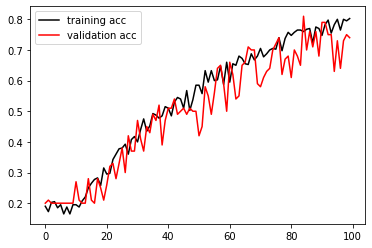

In [ ]:
# overfitting check
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(acc , 'black' , label = 'training acc')
plt.plot(val_acc , 'red' , label = 'validation acc')

plt.legend()
plt.show()

## Transfer Learning

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

# load the weights from a pretrained model
weights_url = "https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5"
weights_file = "inception_v3.h5"
urllib.request.urlretrieve(weights_url, weights_file)
pre_trained_model = InceptionV3(input_shape=(150, 150, 3),
                include_top=False,
                weights=None)
pre_trained_model.load_weights(weights_file)

In [ ]:
pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_4 (Conv2D)              (None, 74, 74, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 74, 74, 32)  96          ['conv2d_4[0][0]']               
 alization)                                                                                       
                                                                                       

In [ ]:
for layer in pre_trained_model.layers:
    layer.trainable = False # we freeze the entire network from retraining and then
last_layer = pre_trained_model.get_layer('mixed7') # setting a variable point to a specific layer - here, mixed7 (arbitrary)
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output # we want to crop the network here

last layer output shape:  (None, 7, 7, 768)


In [ ]:
# Flatten the output layer to 1 dimension
x = tf.keras.layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and relu activation
x = tf.keras.layers.Dense(1024, activation='relu')(x)
# Add a final sigmoid layer for classification
x = tf.keras.layers.Dense(5, activation='softmax')(x)

# define our model as pre_trained + (followed by) x
model2 = tf.keras.Model(pre_trained_model.input, x)
model2.compile(optimizer=RMSprop(lr=0.0001),
       loss='categorical_crossentropy',
       metrics=['acc'])

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
history2 = model2.fit(train_generator, epochs=100,
              validation_data = validation_generator,
                    verbose = 1)

Epoch 1/100
25/25 [==============================] - 9s 244ms/step - loss: 2.3045 - acc: 0.3050 - val_loss: 1.6720 - val_acc: 0.2500
Epoch 2/100
25/25 [==============================] - 6s 234ms/step - loss: 1.3751 - acc: 0.4550 - val_loss: 1.4549 - val_acc: 0.4300
Epoch 3/100
25/25 [==============================] - 5s 202ms/step - loss: 1.3839 - acc: 0.4675 - val_loss: 1.1758 - val_acc: 0.5500
Epoch 4/100
25/25 [==============================] - 5s 202ms/step - loss: 1.0784 - acc: 0.5750 - val_loss: 1.6856 - val_acc: 0.4100
Epoch 5/100
25/25 [==============================] - 5s 201ms/step - loss: 1.0882 - acc: 0.5725 - val_loss: 1.0952 - val_acc: 0.5500
Epoch 6/100
25/25 [==============================] - 5s 201ms/step - loss: 1.0276 - acc: 0.5950 - val_loss: 1.0913 - val_acc: 0.6300
Epoch 7/100
25/25 [==============================] - 5s 201ms/step - loss: 0.9353 - acc: 0.6175 - val_loss: 1.0320 - val_acc: 0.6000
Epoch 8/100
25/25 [==============================] - 5s 204ms/step - 

Validation accuracy turned out to be higher, around 80%.

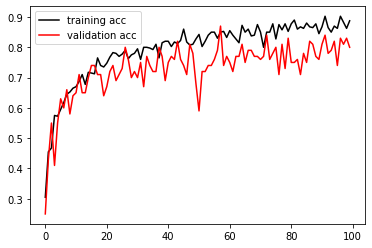

In [ ]:
# checking for overfitting
acc = history2.history['acc']
val_acc = history2.history['val_acc']
plt.plot(acc , 'black' , label = 'training acc')
plt.plot(val_acc , 'red' , label = 'validation acc')

plt.legend()
plt.show()

## Testing predictions

In [ ]:
# get random image of each class (def better way to do this with a loop)
import os, random
random_Ak = random.choice(os.listdir(working_dir + "/Ak"))
random_Ala_Idris = random.choice(os.listdir(working_dir + "/Ala_Idris"))
random_Buzgulu = random.choice(os.listdir(working_dir + "/Buzgulu"))
random_Dimnit = random.choice(os.listdir(working_dir + "/Dimnit"))
random_Nazli = random.choice(os.listdir(working_dir + "/Nazli"))

imgs = []
imgs.append(random_Ak)
imgs.append(random_Ala_Idris)
imgs.append(random_Buzgulu)
imgs.append(random_Dimnit)
imgs.append(random_Nazli)

Ak (43).png


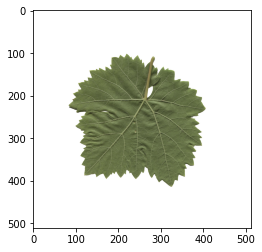

In [ ]:
print(random_Ak)
random_Ak_img=plt.imread(working_dir + "/Ak/" + random_Ak)
imshow(random_Ak_img)

Ala_Idris (43).png


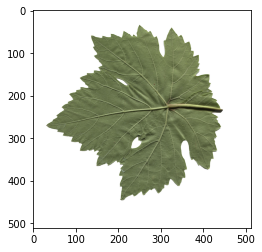

In [ ]:
print(random_Ala_Idris)
random_Ala_Idris_img=plt.imread(working_dir + "/Ala_Idris/" + random_Ala_Idris)
imshow(random_Ala_Idris_img)

Buzgulu (60).png


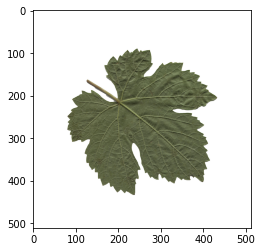

In [ ]:
print(random_Buzgulu)
random_Buzgulu_img=plt.imread(working_dir + "/Buzgulu/" + random_Buzgulu)
imshow(random_Buzgulu_img)

Dimnit (58).png


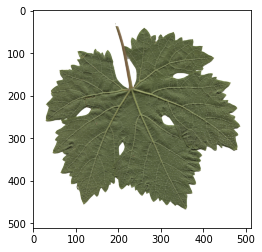

In [ ]:
print(random_Dimnit)
random_Dimnit_img=plt.imread(working_dir + "/Dimnit/" + random_Dimnit)
imshow(random_Dimnit_img)

Nazli (4).png


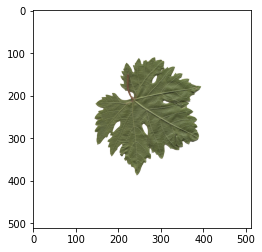

In [ ]:
print(random_Nazli)
random_Nazli_img=plt.imread(working_dir + "/Nazli/" + random_Nazli)
imshow(random_Nazli_img)

In [ ]:
# test the model predictions

for img in imgs:
    path = working_dir + f"/{img.split(' ', 1)[0]}/" + img
    print(path)
    img = image.load_img(path, target_size=(150, 150))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    image_tensor = np.vstack([x])
    predictions = model.predict(image_tensor)
    print(predictions.argmax())

    if predictions.argmax()==0:
        print('Ak')
    elif predictions.argmax()==1:
        print('Ala_Idris')
    elif predictions.argmax()==2:
        print('Buzgulu')
    elif predictions.argmax()==3:
        print('Dimnit')    
    elif predictions.argmax()==4:
        print('Nazli')    

Grapevine_Leaves_Image_Dataset/Ak/Ak (43).png
1/1 [==============================] - 0s 252ms/step
4
Nazli
Grapevine_Leaves_Image_Dataset/Ala_Idris/Ala_Idris (43).png
1/1 [==============================] - 0s 16ms/step
3
Dimnit
Grapevine_Leaves_Image_Dataset/Buzgulu/Buzgulu (60).png
1/1 [==============================] - 0s 14ms/step
2
Buzgulu
Grapevine_Leaves_Image_Dataset/Dimnit/Dimnit (58).png
1/1 [==============================] - 0s 14ms/step
3
Dimnit
Grapevine_Leaves_Image_Dataset/Nazli/Nazli (4).png
1/1 [==============================] - 0s 16ms/step
4
Nazli


In [ ]:
# test the model predictions (transfer learning)

for img in imgs:
    path = working_dir + f"/{img.split(' ', 1)[0]}/" + img
    print(path)
    img = image.load_img(path, target_size=(150, 150))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    image_tensor = np.vstack([x])
    predictions = model2.predict(image_tensor)
    print(predictions.argmax())

    if predictions.argmax()==0:
        print('Ak')
    elif predictions.argmax()==1:
        print('Ala_Idris')
    elif predictions.argmax()==2:
        print('Buzgulu')
    elif predictions.argmax()==3:
        print('Dimnit')    
    elif predictions.argmax()==4:
        print('Nazli')  

Grapevine_Leaves_Image_Dataset/Ak/Ak (43).png
1/1 [==============================] - 1s 1s/step
3
Dimnit
Grapevine_Leaves_Image_Dataset/Ala_Idris/Ala_Idris (43).png
1/1 [==============================] - 0s 94ms/step
3
Dimnit
Grapevine_Leaves_Image_Dataset/Buzgulu/Buzgulu (60).png
1/1 [==============================] - 0s 91ms/step
3
Dimnit
Grapevine_Leaves_Image_Dataset/Dimnit/Dimnit (58).png
1/1 [==============================] - 0s 41ms/step
4
Nazli
Grapevine_Leaves_Image_Dataset/Nazli/Nazli (4).png
1/1 [==============================] - 0s 27ms/step
3
Dimnit


While results are not great for both models, the original model seems to be slightly better at predictions (3/5) compared to one trained with transfer learning (0/5). This perhaps can be partially explained with more overfitting present in the latter case.

## Keras Tuner

In [ ]:
# experimenting with the parameters

def build_model(hp):
    model = tf.keras.models.Sequential()
    # first conv layer
    model.add(tf.keras.layers.Conv2D(
        filters=hp.Int('units',min_value=32, max_value=128, step=16),
        kernel_size=hp.Int('kernels', min_value=3, max_value=9, step=3),
        activation='relu',
        input_shape=(150, 150, 3)
))
    model.add(tf.keras.layers.MaxPooling2D(2, 2))
    # second conv layer
    model.add(tf.keras.layers.Conv2D(
        filters=hp.Int('units', min_value=32, max_value=64, step=16),
        kernel_size=hp.Int('kernels', min_value=3, max_value=9, step=3),
        activation='relu'
    ))

    model.add(tf.keras.layers.MaxPooling2D(2, 2))

    # third conv layer
    model.add(tf.keras.layers.Conv2D(
        filters=hp.Int('units', min_value=64, max_value=128, step=16),
        kernel_size=hp.Int('kernels', min_value=3, max_value=9, step=3),
        activation='relu'
    ))

    model.add(tf.keras.layers.MaxPooling2D(2, 2))

    # forth conv layer
    model.add(tf.keras.layers.Conv2D(
        filters=hp.Int('units', min_value=64, max_value=128, step=16),
        kernel_size=hp.Int('kernels', min_value=3, max_value=9, step=3),
        activation='relu'
    ))

    model.add(tf.keras.layers.MaxPooling2D(2, 2))

    # flatten
    model.add(tf.keras.layers.Flatten()),

    # dense layer
    model.add(tf.keras.layers.Dense(
        units=hp.Int('dense_units', min_value=64, max_value=256, step=32),
        activation='relu'
    ))
    # output layer    
    model.add(tf.keras.layers.Dense(5, activation='softmax'))

    #compilation of model
    model.compile(optimizer="rmsprop",
              loss='categorical_crossentropy',
              metrics=['accuracy'])
    return model

In [ ]:
import keras_tuner
from tensorflow import keras
tuner = keras_tuner.RandomSearch(build_model, objective='loss',
                          max_trials=5, executions_per_trial=3,
                          directory='my_dir', project_name='cnn-tune')
tuner.search_space_summary()
tuner.search(train_generator, epochs=100, verbose=1, validation_data=validation_generator)

Trial 5 Complete [00h 25m 15s]
loss: 1.320840100447337

Best loss So Far: 0.5681787331899008
Total elapsed time: 02h 06m 27s


In [ ]:
# changing parameters based on the tuner results
model3 = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image:
    # 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(48, (3,3), activation='relu',
        input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(48, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # dense layer
    tf.keras.layers.Dense(160, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

model3.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 48)      1344      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 74, 74, 48)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 72, 72, 48)        20784     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 36, 36, 48)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 34, 34, 128)       55424     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 17, 17, 128)     

In [ ]:
# compiling the model
model3.compile(loss = 'categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# training the model
history3 = model3.fit(train_generator, epochs=100,
              validation_data = validation_generator,
                    verbose = 1)

Epoch 1/100
25/25 [==============================] - 6s 191ms/step - loss: 2.4894 - accuracy: 0.1975 - val_loss: 1.6135 - val_accuracy: 0.2000
Epoch 2/100
25/25 [==============================] - 5s 187ms/step - loss: 1.6179 - accuracy: 0.2050 - val_loss: 1.6084 - val_accuracy: 0.3000
Epoch 3/100
25/25 [==============================] - 5s 191ms/step - loss: 1.6333 - accuracy: 0.2200 - val_loss: 1.6086 - val_accuracy: 0.2000
Epoch 4/100
25/25 [==============================] - 5s 185ms/step - loss: 1.6112 - accuracy: 0.2050 - val_loss: 1.6072 - val_accuracy: 0.2000
Epoch 5/100
25/25 [==============================] - 5s 185ms/step - loss: 1.6415 - accuracy: 0.2025 - val_loss: 1.6085 - val_accuracy: 0.2000
Epoch 6/100
25/25 [==============================] - 5s 187ms/step - loss: 1.6160 - accuracy: 0.1850 - val_loss: 1.6074 - val_accuracy: 0.2000
Epoch 7/100
25/25 [==============================] - 6s 240ms/step - loss: 1.6104 - accuracy: 0.2050 - val_loss: 1.6014 - val_accuracy: 0.2200

In [ ]:
# test the model predictions

for img in imgs:
    path = working_dir + f"/{img.split(' ', 1)[0]}/" + img
    print(path)
    img = image.load_img(path, target_size=(150, 150))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    image_tensor = np.vstack([x])
    predictions = model3.predict(image_tensor)
    print(predictions.argmax())

    if predictions.argmax()==0:
        print('Ak')
    elif predictions.argmax()==1:
        print('Ala_Idris')
    elif predictions.argmax()==2:
        print('Buzgulu')
    elif predictions.argmax()==3:
        print('Dimnit')    
    elif predictions.argmax()==4:
        print('Nazli')  

Grapevine_Leaves_Image_Dataset/Ak/Ak (43).png
1/1 [==============================] - 1s 581ms/step
0
Ak
Grapevine_Leaves_Image_Dataset/Ala_Idris/Ala_Idris (43).png
1/1 [==============================] - 0s 56ms/step
1
Ala_Idris
Grapevine_Leaves_Image_Dataset/Buzgulu/Buzgulu (60).png
1/1 [==============================] - 0s 71ms/step
2
Buzgulu
Grapevine_Leaves_Image_Dataset/Dimnit/Dimnit (58).png
1/1 [==============================] - 0s 39ms/step
4
Nazli
Grapevine_Leaves_Image_Dataset/Nazli/Nazli (4).png
1/1 [==============================] - 0s 37ms/step
4
Nazli


We achieved the best result yet, with the model being able to predict 4 out of 5 leave kinds correctly. Though, this result might still occur due to chance. Model requires further experimentation to augment results.